# NLP assignment - Tobigs14 이혜린

## NLP Process  
  
> Data Collection(Crawling)  
Tokenizing(Stemming, Stopword, Lemmatization, Pos Tagging)  
Embedding(Word2Vec, GloVe, FastText, TF-IDF)  
Similarity(Euclidean, Cosine, Jaccard)  
Network(RNN, LSTM)  
  
  
* Data Collection : corpus(텍스트의 집합) 수집  
* Tokenizing : 의미를 가진 가장 작은 말의 단위로 쪼개기 (형태소, 단어...). Stopwords(불용어)도 제거해준다!  
영어 : NLTK  /  한글 : KONLPY, Khaiii, Kkma, Komoran, Mecab, Twitter(Okt), Hannaum 
* Embedding : 자연어를 숫자의 나열인 벡터로 변환하기  
* Similarity : 유사도 파악

## 1. 단어 임베딩


### Word2Vec  
비슷한 위치에서 등장하는 단어들은 비슷한 위치를 가진다!  
단어를 타깃 / 맥락으로 나눈다. 맥락으로 보는 단어의 개수 = 윈도우(Window)  
윈도우가 2개면 타깃 앞뒤 두개의 단어를 맥락으로 보는 것  
  
  
1. CBOW   
입력 : 맥락 단어의 one hot vector > 출력 : 타깃 단어의 one hot vector  
타깃 단어가 주어지면, 타깃 단어와 각 맥락단어를 함께 학습한다 (타깃 단어로 예측할 확률과 실제 타깃 단어의 one hot vector를 비교해서 이 때 발생하는 crossentropy를 최소화. Backpropagation!)  
  
2. Skip-gram (CBOW보다 성능 좋음)
입력 : 타깃 단어의 one hot vector > 출력 : 맥락 단어의 one hot vector  
타깃 단어가 주어지고, 타깃 단어와 각 맥락단어를 따로따로 학습한다 (타깃 단어가 주어졌을 때 주변 단어가 나타날 확률을 최대화)  
  
  
* 단점
한번에 하나의 출현만 고려하므로 비효율적  
train corpus에 존재하지 않았던 단어의 벡터는 만들 수 없다  
단어 개수에 비례하는 계산량 > hierarchical softmax 및 negative sampling 이용  
크게 의미 없고 자주 등장하는 단어도 고려 > subsampling 하기  

### GloVe  
전체 텍스트의 정보를 이용. 동시 등장 확률을 고려~  

### FastText  
Word2Vec의 한계인 Out-of-Vocabulary를 보완~ n-gram이 최소 단위 (단어 X)  
train data에 존재하지 않았거나 희소한 단어에 대해 더 좋은 embedding 가능

## 2. 문서 임베딩  
  
  
### TF-IDF  
단어 빈도와 역 문서 빈도를 사용하여 DTM(Document Term Matrix) 내의 각 단어들마다 가중치(=중요도)를 주는 법  
> 단어 빈도 tf(d, t) = 특정 빈도 d에서 특정 단어 t의 등장 횟수  
문서 빈도 df(t) = 특정 단어 t가 등장한 문서의 수  
역문서 빈도 idf(d,t) = df(t)에 반비례하는 수 (빈도가 높은 중요하지 않은 단어의 가중치를 줄이기 위해...)  

가중치 = 단어 빈도 * 역문서 빈도  
$w_{t,d} = tf_{d,t} * log_{10}(\frac{n}{1 + df(t)})$

## 3. 유사도
  
  
### Euclidean Similarity

### Cosine Similarity ★ 
두 벡터 간 코사인 각도로 유사도 측정. 1에 가까울수록 유사도가 높고 -1에 가까울수록 정반대의 유사도를 가진다

### Jaccard Similarity  
교집합 크기 / 합집합 크기

# Assignment : spam.csv를 가지고 유의미한 해석을 도출해주세요!

In [258]:
# 필요한 모듈 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Load Data
- 보시면 spam.csv는 라벨이 있는 데이터예요. 물론 8주차 주체가 텍스트 기초인만큼 텍스트만 활용하셔도 되고 라벨까지 활용하셔서 모델을 돌려볼 수도 있어요!

In [4]:
spam = pd.read_csv('./spam.csv')

In [5]:
spam.head()

v1                                                 v2
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...

In [252]:
text = [line.lower() for line in spam.iloc[:,1]] # 대소문자 구분 제거
text[0:10]

['go until jurong point, crazy.. available only in bugis n great world la e buffet... cine there got amore wat...',
 'ok lar... joking wif u oni...',
 "free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005. text fa to 87121 to receive entry question(std txt rate)t&c's apply 08452810075over18's",
 'u dun say so early hor... u c already then say...',
 "nah i don't think he goes to usf, he lives around here though",
 "freemsg hey there darling it's been 3 week's now and no word back! i'd like some fun you up for it still? tb ok! xxx std chgs to send, å£1.50 to rcv",
 'even my brother is not like to speak with me. they treat me like aids patent.',
 "as per your request 'melle melle (oru minnaminunginte nurungu vettam)' has been set as your callertune for all callers. press *9 to copy your friends callertune",
 'winner!! as a valued network customer you have been selected to receivea å£900 prize reward! to claim call 09061701461. claim code kl341. valid 12 hours only.',
 'had y

## Tokenizing
- 실습코드는 물론 한국어 대상이라 konlpy를 다뤘지만, 슬라이드 보시면 영어는 nltk 모듈을 쓸 수 있어요. 의미 있는 토큰으로 쪼개고 불용어도 처리해보세요! 현존하는 불용어 리스트를 사용해도 좋고, 새롭게 만들어도 좋을 것 같아요!

nltk 참고자료 첨부합니다! [참고자료](https://rfriend.tistory.com/546)

In [1]:
import nltk

In [2]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hyeli\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [22]:
nltk.download('averaged_perceptron_tagger') # 품사 태깅을 위해 다운로드

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\hyeli\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


True

In [16]:
text[0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [82]:
def make_corpus(text):
    result = []
    for mail in text:
        result.append(nltk.pos_tag(nltk.word_tokenize(mail)))
    return result

In [256]:
corpus = make_corpus(text)
corpus[0:2] # 튜플 형태로 반환

[[('go', 'VB'),
  ('until', 'IN'),
  ('jurong', 'JJ'),
  ('point', 'NN'),
  (',', ','),
  ('crazy', 'JJ'),
  ('..', 'NN'),
  ('available', 'JJ'),
  ('only', 'RB'),
  ('in', 'IN'),
  ('bugis', 'NN'),
  ('n', 'RB'),
  ('great', 'JJ'),
  ('world', 'NN'),
  ('la', 'NN'),
  ('e', 'FW'),
  ('buffet', 'NN'),
  ('...', ':'),
  ('cine', 'NN'),
  ('there', 'EX'),
  ('got', 'VBD'),
  ('amore', 'RB'),
  ('wat', 'NN'),
  ('...', ':')],
 [('ok', 'JJ'),
  ('lar', 'NN'),
  ('...', ':'),
  ('joking', 'VBG'),
  ('wif', 'JJ'),
  ('u', 'JJ'),
  ('oni', 'NN'),
  ('...', ':')]]

In [72]:
tag_list = ['EX','FW','JJ','JJR','JJS','FW','MD','NN','NNS','NNP','NNPS',
            'PDT','PRP','RB','RBR','RBS','RP','VB','VBD','VBG','VBN','VBP','VBZ']

# 관계대명사, the, 전치사, 숫자, 특수문자,'s, there is 등을 제외한 품사 리스크

In [240]:
def delete_stopwords_tag(corpus):
    result = []
    for i in range(len(corpus)):
        answer = []
        for j in range(len(corpus[i])):
            if corpus[i][j][1] in tag_list: # tag_list 안에 품사가 있는 토큰만 선택
                answer.append('/'.join(corpus[i][j])) #리스트 형태로 변환. 이때는 품사 선택!
        result.append(answer)
    return result

In [255]:
clean_corpus_tag = delete_stopwords_tag(corpus)
clean_corpus_tag[0:2] # 불용어를 제거한 corpus with 품사

[['go/VB',
  'jurong/JJ',
  'point/NN',
  'crazy/JJ',
  '../NN',
  'available/JJ',
  'only/RB',
  'bugis/NN',
  'n/RB',
  'great/JJ',
  'world/NN',
  'la/NN',
  'e/FW',
  'buffet/NN',
  'cine/NN',
  'there/EX',
  'got/VBD',
  'amore/RB',
  'wat/NN'],
 ['ok/JJ', 'lar/NN', 'joking/VBG', 'wif/JJ', 'u/JJ', 'oni/NN']]

In [152]:
def delete_stopwords(corpus):
    result = []
    for i in range(len(corpus)):
        answer = []
        for j in range(len(corpus[i])):
            if corpus[i][j][1] in tag_list: # tag_list 안에 품사가 있는 토큰만 선택
                answer.append(corpus[i][j][0]) #리스트 형태로 변환. 이때는 품사 빼고 선택!
        result.append(answer)
    return result

In [257]:
clean_corpus = delete_stopwords(corpus)
clean_corpus[0:2] # 불용어를 제거한 corpus

[['go',
  'jurong',
  'point',
  'crazy',
  '..',
  'available',
  'only',
  'bugis',
  'n',
  'great',
  'world',
  'la',
  'e',
  'buffet',
  'cine',
  'there',
  'got',
  'amore',
  'wat'],
 ['ok', 'lar', 'joking', 'wif', 'u', 'oni']]

## Embedding

- 수업에서 다룬 임베딩 방법에는 One-hot encoding, CBOW, Skip-gram, GloVe, FastText가 있었어요. 왜 이 임베딩 모델을 적용하게 되었는지 '비교' 결과와 함께 적어주세요!

glove는 패키지 설치할 때 오류가 나서 skip 했습니다 ㅜㅜ  
fasttext는 mac os, linux에서만 설치가 가능한데 저는 window라...

### One Hot Encoding

In [154]:
# 메일 하나에 대해서 '단어' : 인덱스 dictionary를 만들어주는 함수 생성

def word_dic(text):
    result = {}
    for word in text:
        if word not in result:
            result[word] = len(result)
    return result

In [155]:
word_dic(clean_corpus[0])

{'go': 0,
 'jurong': 1,
 'point': 2,
 'crazy': 3,
 '..': 4,
 'available': 5,
 'only': 6,
 'bugis': 7,
 'n': 8,
 'great': 9,
 'world': 10,
 'la': 11,
 'e': 12,
 'buffet': 13,
 'cine': 14,
 'there': 15,
 'got': 16,
 'amore': 17,
 'wat': 18}

In [157]:
# One Hot Encoding 함수 만들기

def one_hot_encoding(word_list, target_word):
    result = np.zeros(len(word_list))
    if target_word in word_list.keys():
        index = word_list[target_word]
        result[index] = 1
    return result

In [159]:
# target word와 일치하는 값이 메일에 있는 경우

one_hot_encoding(word_dic(clean_corpus[0]), 'available')

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.])

In [161]:
# target word와 일치하는 값이 메일에 없는 경우

one_hot_encoding(word_dic(clean_corpus[0]), 'free')

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.])

In [139]:
# 모든 메일을 one hot encoding 하는 함수

def one_hot_encoding_full(corpus, target_word):
    result = []
    for text in corpus:
        result.append(one_hot_encoding(word_dic(text), target_word))
    return result

In [162]:
one_hot_encoding_full(clean_corpus, 'available')[0:5]

[array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.]),
 array([0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])]

### Word2Vec  
> size : 임베딩 차원  
window : 윈도우 사이즈  
min_count : 고려할 단어의 최소 빈도 기준  
workers : cpu core 수  
iter : 반복 학습 횟수(epoch)  
sg : 0 -> CBOW, 1 -> Skip-Gram  

In [87]:
from gensim.models import Word2Vec, fasttext

#### CBOW  

In [245]:
model_cbow = Word2Vec(clean_corpus, size=10, window=5, min_count=1, iter=1000, sg=0) #10차원

In [246]:
# 코사인 유사도 기반으로 happy와 유사한 토큰 추출하기
model_cbow.wv.most_similar("happy")

[('risk', 0.9295446872711182),
 ('jeremiah', 0.8884599208831787),
 ('arr', 0.8862259387969971),
 ('alive', 0.8692440390586853),
 ('wishing', 0.8686420321464539),
 ('stressfull', 0.8541226983070374),
 ('christmas', 0.8462263345718384),
 ('difficult', 0.8387923240661621),
 ('memorable', 0.8347150683403015),
 ('then.will', 0.8346753716468811)]

happy와 유사성이 높은 단어를 봤을 때, alive, wishing, christmasm, memorable 과 같은 긍정적인 단어들도 있지만 반대로 risk, stressfull, difficult와 같은 단어들도 있다. 이는 반어법이나 happy, but ... 과 같은 형태로 문장에서 많이 쓰였기 때문이지 않을까라고 추측해본다.

#### Skip-gram

In [180]:
model_skip = Word2Vec(clean_corpus, size=10, window=5, min_count=1, iter=1000, sg=1) #10차원

In [181]:
# 코사인 유사도 기반으로 happy와 유사한 토큰 추출하기
model_skip.wv.most_similar("happy")

[('shivratri', 0.9369129538536072),
 ('sankranti', 0.9340373277664185),
 ('republic', 0.9338431358337402),
 ('ugadi', 0.9332194328308105),
 ('wish', 0.9323343634605408),
 ('day', 0.9284884929656982),
 ('fools', 0.9280641078948975),
 ('returns', 0.9216261506080627),
 ('oil', 0.9146481156349182),
 ('me.remove', 0.9052301049232483)]

같은 hyperparameter를 가지고 CBOW 모델과 Skip-gram을 돌렸을 때 Skip-gram의 Similarity가 CBOW에 비해 상대적으로 작다.  
또한 Skip-gram도 CBOW와 마찬가지로 happy와 긍정적인 단어도 유사도가 높게 나왔지만, fools와 같은 단어도 유사도가 높게 나왔다. 이는 위와 마찬가지로 반어법이나 happy, but ... 과 같은 형태로 문장에서 많이 쓰였기 때문이라고 생각한다.

## 해석

- Plot, Wordcloud, 이진 분류 모델, 유사도 뭐든 관계없으니 분명하고 인상적인 해석 부탁드려요!  
  
### T-SNE를 통한 시각화

In [188]:
from sklearn.manifold import TSNE

#### CBOW

In [207]:
data_c = model_cbow[list(model_cbow.wv.vocab)]

In [208]:
tsne_cbow = TSNE(n_components=2)
data_cbow = tsne_cbow.fit_transform(model_cbow[list(model_cbow.wv.vocab)])
df_cbow = pd.DataFrame(data_cbow, index=model_cbow.wv.vocab, columns=['x', 'y'])
df_cbow

x          y
go           -2.935517  63.284592
jurong       22.976017 -14.611628
point        18.931938  65.492065
crazy       -37.789337  52.345226
..          -11.909825   3.911115
...                ...        ...
å£750       -20.633352 -28.989286
now1         19.726492 -17.541998
pity         -1.337742  40.075729
suggestions -18.583706  54.238014
bitching     41.737171  61.560719

[8403 rows x 2 columns]

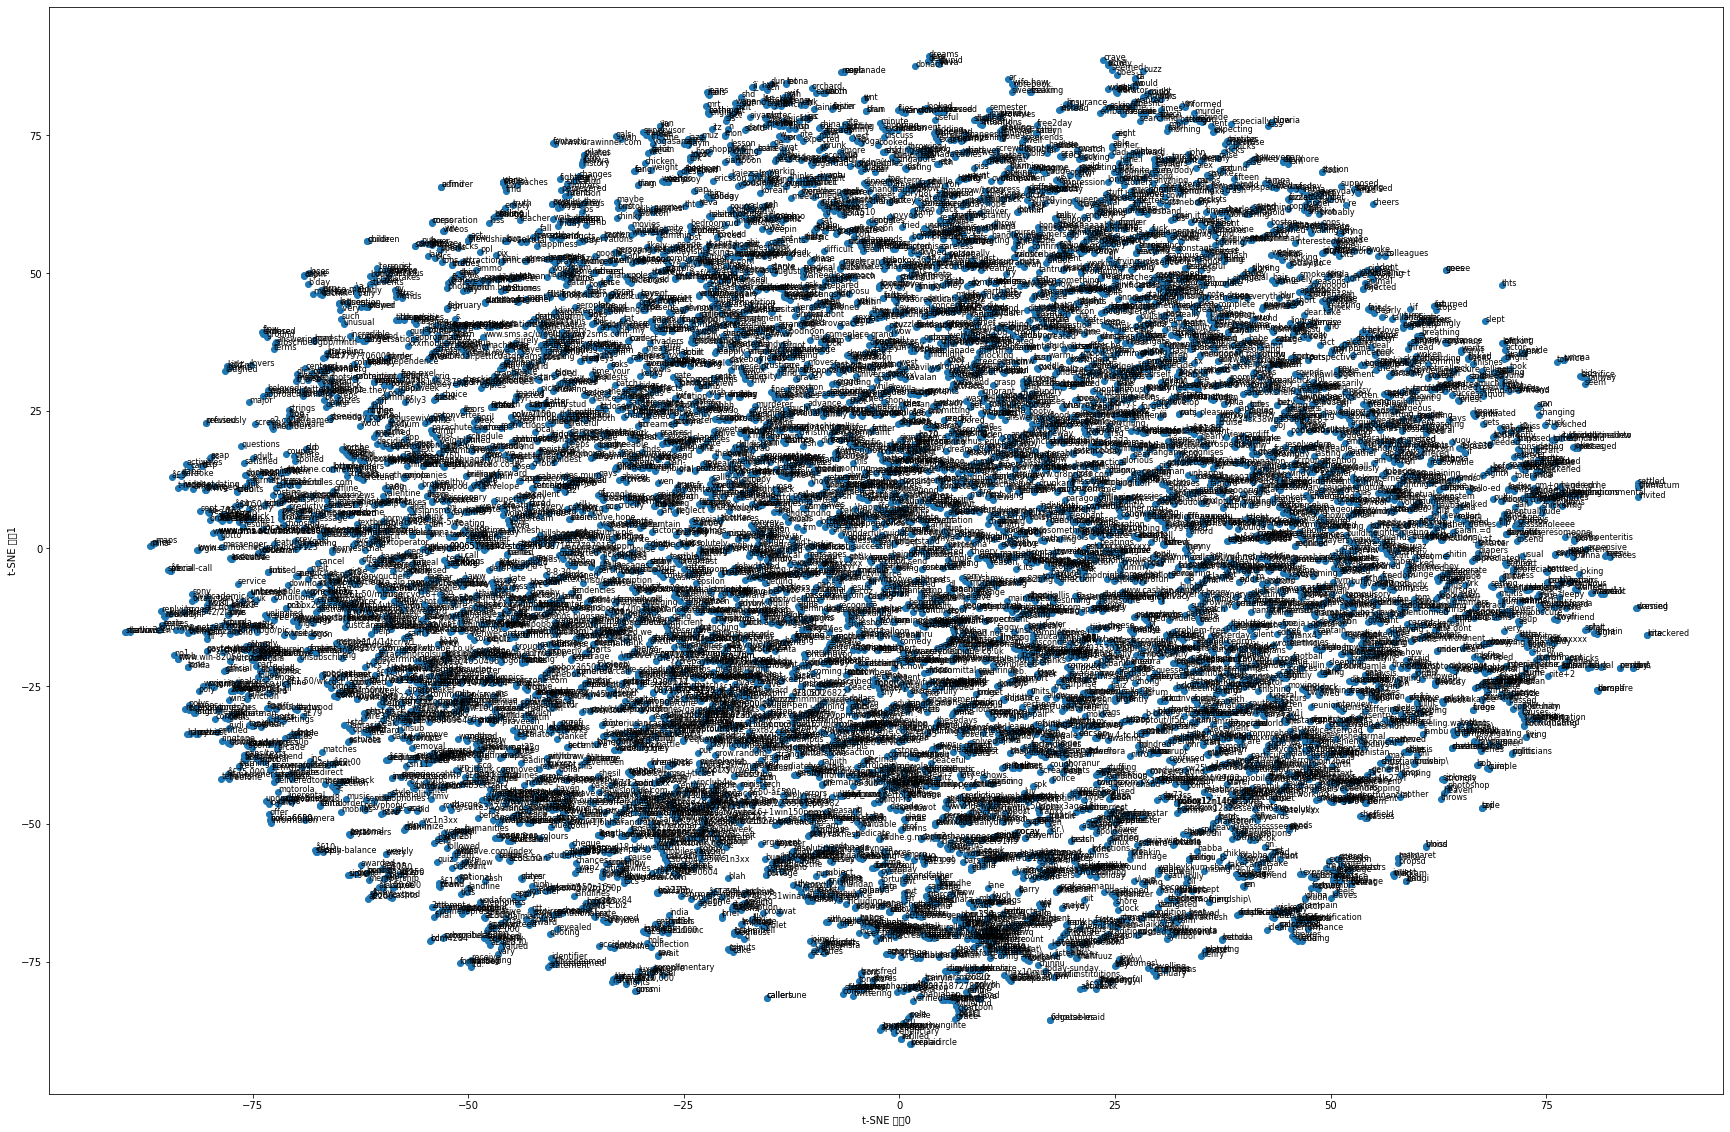

In [209]:
fig = plt.figure()
fig.set_size_inches(30,20)
ax = fig.add_subplot(1,1,1)
ax.scatter(df_cbow['x'], df_cbow['y'])
for word, pos in df_cbow.iterrows():
    ax.annotate(word, pos, fontsize=8)
plt.xlabel('t-SNE 특성0')
plt.ylabel('t-SNE 특성1')
plt.show()

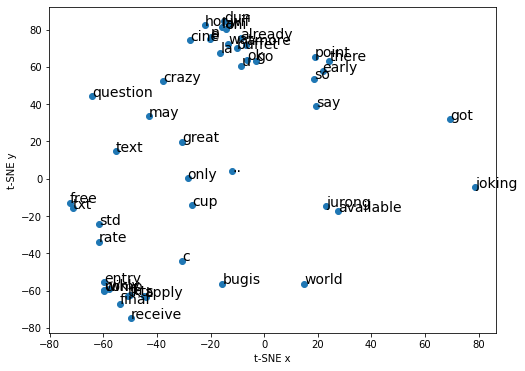

In [236]:
fig = plt.figure()
fig.set_size_inches(8,6)
ax = fig.add_subplot(1,1,1)
plt.scatter(df_cbow.iloc[0:50,0], df_cbow.iloc[0:50,1])
for word, pos in df_cbow[0:50].iterrows():
    ax.annotate(word, pos, fontsize=14)
plt.xlabel('t-SNE x')
plt.ylabel('t-SNE y')
plt.show()

#### Skip-gram

In [191]:
data_s = model_skip[list(model_skip.wv.vocab)]

In [206]:
tsne_skip = TSNE(n_components=2)
data_skip = tsne_skip.fit_transform(model_skip[list(model_skip.wv.vocab)])
df_skip = pd.DataFrame(data_skip, index=model_skip.wv.vocab, columns=['x', 'y'])
df_skip

x          y
go          -10.567336  -4.455632
jurong      -31.959227 -13.565644
point       -24.812735 -20.267609
crazy         8.085102 -17.354460
..           25.323467  -3.998526
...                ...        ...
å£750       -32.023361  67.406898
now1        -18.067945  78.987778
pity        -26.783922 -53.605110
suggestions -26.919966 -53.670258
bitching    -35.008781 -47.003258

[8403 rows x 2 columns]

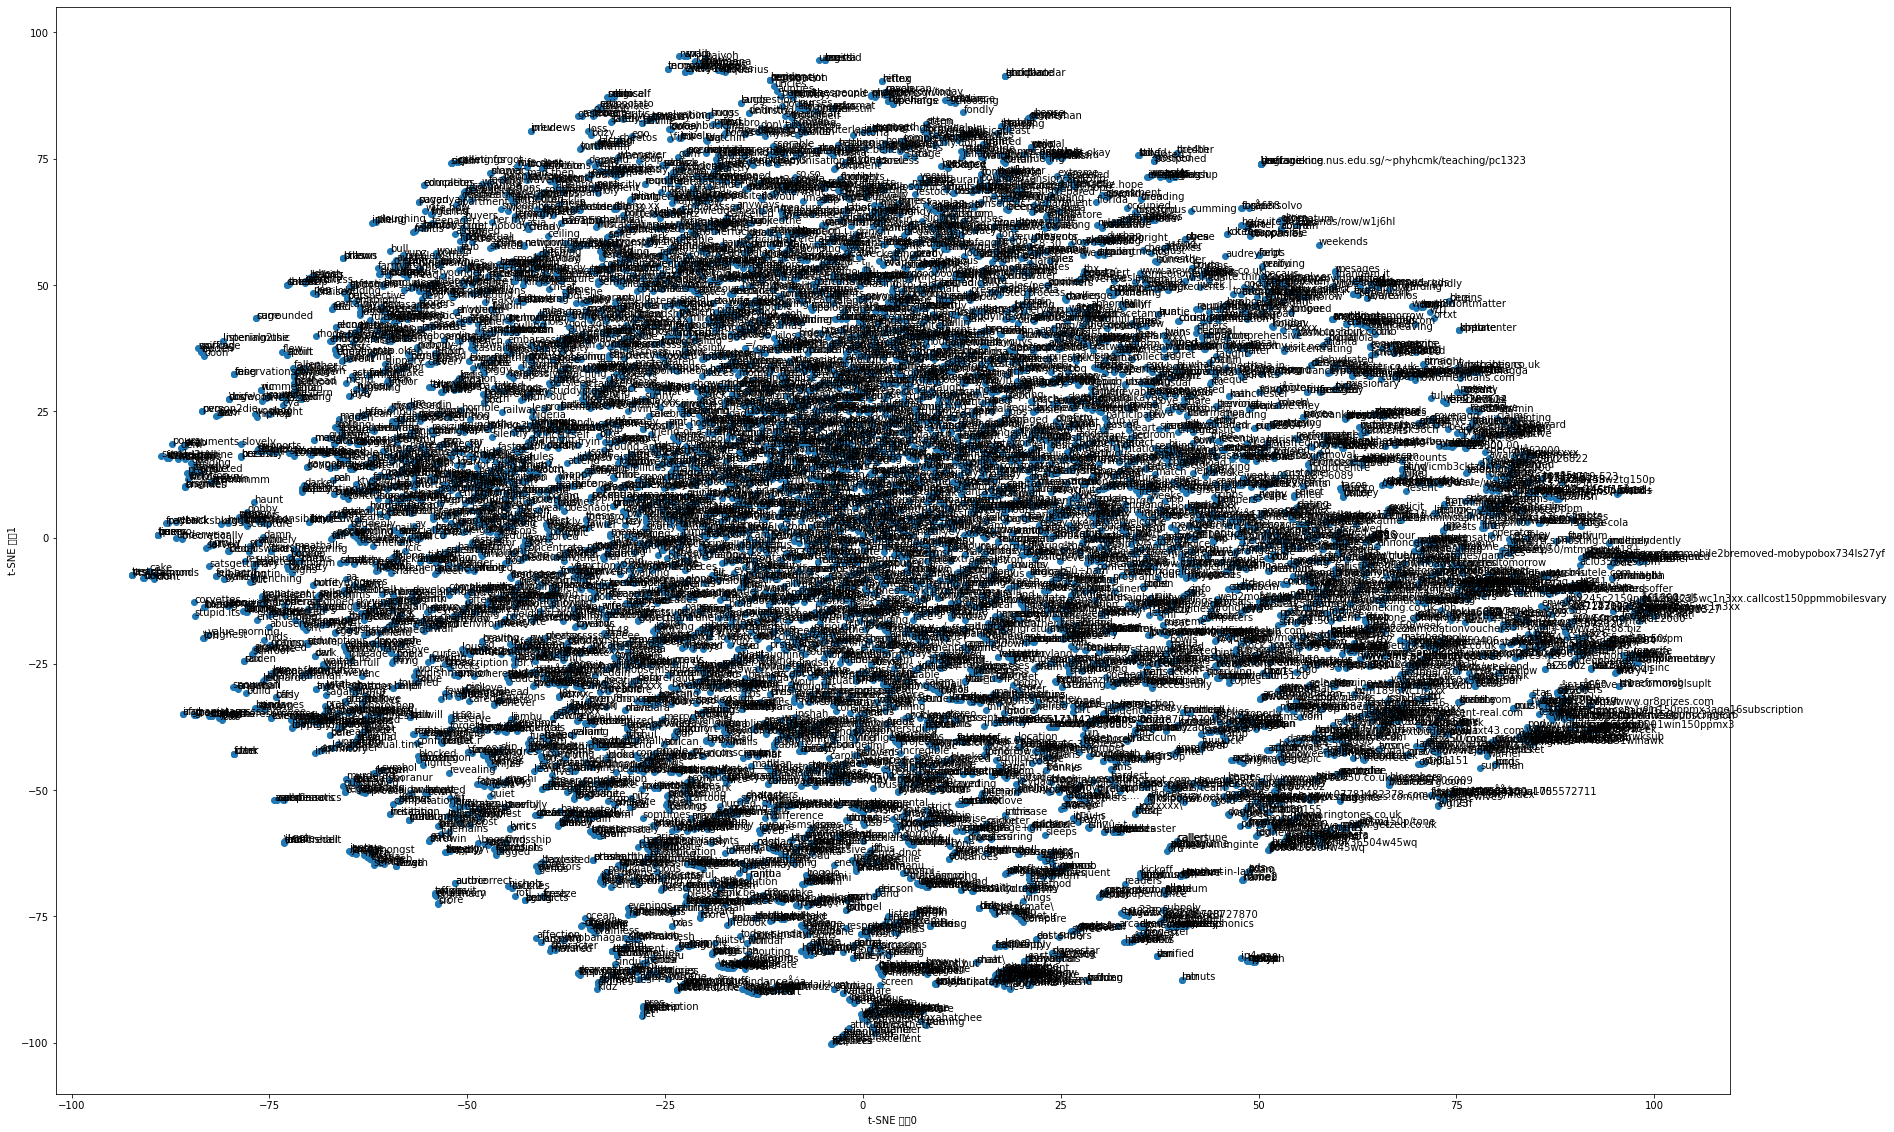

In [202]:
fig = plt.figure()
fig.set_size_inches(30,20)
ax = fig.add_subplot(1,1,1)
ax.scatter(df_skip['x'], df_skip['y'])
for word, pos in df_skip.iterrows():
    ax.annotate(word, pos, fontsize=10)
plt.xlabel('t-SNE 특성0')
plt.ylabel('t-SNE 특성1')
plt.show()

단어가 너무 많아서 조금 징그럽네요....! 하하

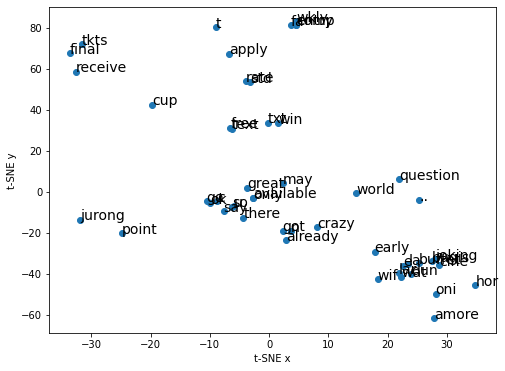

In [237]:
fig = plt.figure()
fig.set_size_inches(8,6)
ax = fig.add_subplot(1,1,1)
plt.scatter(df_skip.iloc[0:50,0], df_skip.iloc[0:50,1])
for word, pos in df_skip[0:50].iterrows():
    ax.annotate(word, pos, fontsize=14)
plt.xlabel('t-SNE x')
plt.ylabel('t-SNE y')
plt.show()